In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Uncomment this line if using this notebook locally
df = pd.read_csv(r'C:\Users\18369\Desktop\SelectionDay\Udemy\DL for business\Data science and deep learning for business\original_datasets\datascienceforbusiness-master\WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')

df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [3]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  548
Columns  :  7

Features : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing values :   0

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


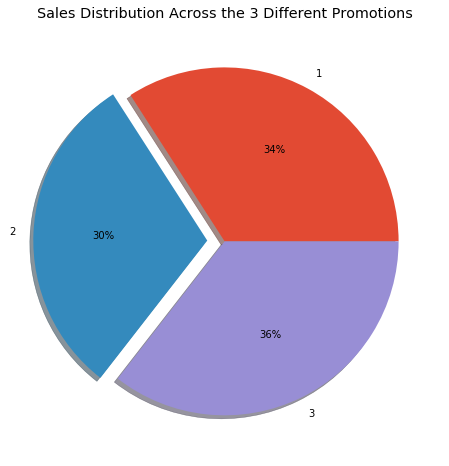

In [4]:
# Using ggplot's style
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode = (0, 0.1, 0))
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

In [5]:
 df.groupby(['Promotion', 'MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [6]:
df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


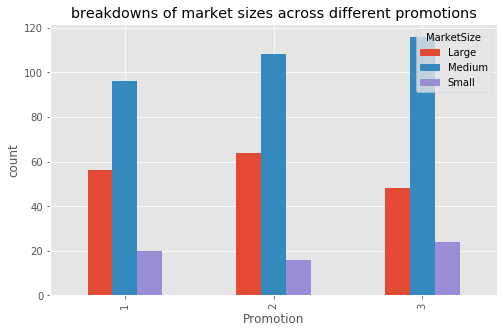

In [10]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(8,5),
    grid=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

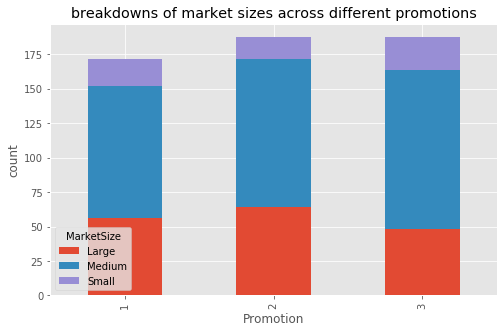

In [11]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(8,5),
    grid=True,
    stacked=True) ## only different para.

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

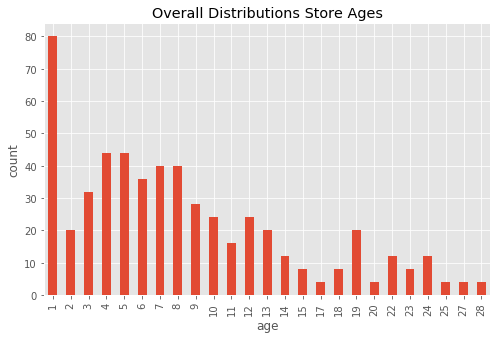

In [12]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar', 
    figsize=(8,5),
    grid=True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Overall Distributions Store Ages')

plt.show()

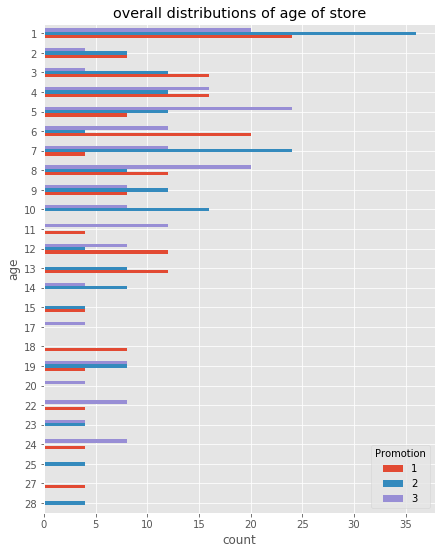

In [14]:
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh', 
    figsize=(7,9),
    grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [16]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']
print(means)
print(stds)
print(ns)

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


## Comparing 3 promotions in A/B test

In [15]:
# Computing the t and p values using scipy 
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p)) ## significant

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


In [17]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p)) ## >0.05, no significance

t-value = 1.5560224307758634
p-value = 0.12059147742229478
